In [1]:
#!pip install -U tensorflow

In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# organise data

In [66]:
df = pd.read_csv('../raw_data/cassava-leaf-disease-classification/train.csv')
df.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [67]:
num_classes = len(df.label.unique())

In [68]:
import json
label_map = json.load(open('../raw_data/cassava-leaf-disease-classification/label_num_to_disease_map.json'))
label_map


{'0': 'Cassava Bacterial Blight (CBB)',
 '1': 'Cassava Brown Streak Disease (CBSD)',
 '2': 'Cassava Green Mottle (CGM)',
 '3': 'Cassava Mosaic Disease (CMD)',
 '4': 'Healthy'}

In [69]:
label_map = {'0': 'cassava_bacterial_blight',
 '1': 'cassava_brown_streak_disease',
 '2': 'cassava_green_mottle',
 '3': 'cassava_mosaic_disease',
 '4': 'healthy'}

In [70]:
df['label_text'] = df.label.astype(str).map(label_map)

# Get Data

In [7]:
labels_list = df.sort_values('image_id').label.values.tolist()

In [83]:
#'/Users/alecsharp/me/cassava_farmer/raw_data/cassava-leaf-disease-classification/train_images'

train_path = '../raw_data/cassava-leaf-disease-classification/train_images'
batch_size = 32

from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    train_path, batch_size=32, subset='training', validation_split=.20, seed = 42, image_size=(512, 512),
)

class_names = train_ds.class_names
print(train_ds)
print(train_ds.cardinality())

train_size = train_ds.cardinality().numpy()
train_ds = train_ds.unbatch().batch(batch_size)
train_ds = train_ds.repeat()


val_ds = image_dataset_from_directory(
    train_path, batch_size=32, subset='validation', validation_split=.20, seed = 42, image_size=(512, 512)
)

val_size = val_ds.cardinality().numpy()
val_ds = val_ds.unbatch().batch(batch_size)
val_ds = val_ds.repeat()


ValueError: `color_mode` must be one of {"rgb", "rgba", "grayscale"}. Received: color_mode=bgr

In [84]:
print(train_ds)

<RepeatDataset shapes: ((None, 512, 512, 3), (None,)), types: (tf.float32, tf.int32)>


In [ ]:
train_ds = image_dataset_from_directory(
    train_path, batch_size=32, subset='training', validation_split=.20, seed = 42, image_size=(512, 512),
)

In [98]:
x, y = next(iter(train_ds))
image = x[0, :, :, :]

#print(image)
image = tf.cast(image, 'intu8')

#plt.imshow(image)
np.min(image), np.max(image)

TypeError: Cannot convert value 'int' to a TensorFlow DType.

In [30]:
np.argmax(y[0])

0

In [31]:
ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

# Transfer learning

In [32]:
#!pip install tensorflow_hub

In [33]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
from PIL import Image
from io import BytesIO

In [34]:
model_name = "efficientnetv2-xl-21k" # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

model_handle = model_handle_map.get(model_name)
pixels = model_image_size_map.get(model_name, 224)

print(f"Selected model: {model_name} : {model_handle}")

IMAGE_SIZE = (pixels, pixels)
print(f"Input size {IMAGE_SIZE}")

BATCH_SIZE = 32

Selected model: efficientnetv2-xl-21k : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Input size (512, 512)


In [43]:
def build_dataset(path, subset):
    return tf.keras.preprocessing.image_dataset_from_directory(
        path,
        validation_split=.20,
        subset=subset,
        label_mode = 'categorical',
        # Seed needs to provided when using validation_split and shuffle = True.
        # A fixed seed is used so that the validation set is stable across runs.
        seed=123,
        image_size=IMAGE_SIZE,
        batch_size=32)

train_ds = build_dataset(train_path, "training")
class_names = tuple(train_ds.class_names)
train_size = train_ds.cardinality().numpy()
train_ds = train_ds.unbatch().batch(BATCH_SIZE)
train_ds = train_ds.repeat()

# normalization_layer = tf.keras.layers.Rescaling(1. / 255)
# preprocessing_model = tf.keras.Sequential([normalization_layer])

# do_data_augmentation = True

# if do_data_augmentation:
#     preprocessing_model.add(tf.keras.layers.RandomRotation(40))
#     preprocessing_model.add(tf.keras.layers.RandomTranslation(0, 0.2))
#     preprocessing_model.add(tf.keras.layers.RandomTranslation(0.2, 0))
#     # Like the old tf.keras.preprocessing.image.ImageDataGenerator(),
#     # image sizes are fixed when reading, and then a random zoom is applied.
#     # If all training inputs are larger than image_size, one could also use
#     # RandomCrop with a batch size of 1 and rebatch later.
#     preprocessing_model.add(tf.keras.layers.RandomZoom(0.2, 0.2))
#     preprocessing_model.add(tf.keras.layers.RandomFlip(mode="horizontal"))

# train_ds = train_ds.map(lambda images, labels:
#                         (preprocessing_model(images), labels))

val_ds = build_dataset(train_path, "validation")
valid_size = val_ds.cardinality().numpy()
val_ds = val_ds.unbatch().batch(BATCH_SIZE)
# val_ds = val_ds.map(lambda images, labels:
#                     (normalization_layer(images), labels))

Found 21397 files belonging to 5 classes.
Using 17118 files for training.
Found 21397 files belonging to 5 classes.
Using 4279 files for validation.


In [44]:
classifier = hub.load(model_handle)

In [45]:
do_fine_tuning = False

In [45]:
image_shape = (512, 512, 3)
output_classes = 5

In [46]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomRotation(40),
    tf.keras.layers.RandomTranslation(0, 0.2),
    tf.keras.layers.RandomTranslation(0.2, 0),
    tf.keras.layers.RandomZoom(0.2, 0.2),
    tf.keras.layers.RandomFlip(mode="horizontal")
])

In [47]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

dummy_input = tf.keras.layers.Input(shape=image_shape)


topless_efficient_net = EfficientNetB0(
    include_top=False, weights='imagenet', input_tensor=dummy_input, pooling = 'max'
)

In [53]:
aug_eff_model = tf.keras.Sequential([tf.keras.layers.Resizing(512, 512),
                    augmentation,
                    topless_efficient_net,
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(5, activation = 'softmax')])

aug_eff_model.compile(optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy',
                     metrics = 'accuracy')

aug_eff_model.build((None, 512, 512, 3))
aug_eff_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_10 (Resizing)      (None, 512, 512, 3)       0         
                                                                 
 sequential_14 (Sequential)  (None, 512, 512, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 dropout_10 (Dropout)        (None, 1280)              0         
                                                                 
 dense_10 (Dense)            (None, 5)                 6405      
                                                                 
Total params: 4,055,976
Trainable params: 4,013,953
Non-trainable params: 42,023
_________________________________________________________________


In [52]:
# finetune transfer model

print("Building model with", model_handle)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    processing_augmentation,
    hub.KerasLayer(model_handle, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation = 'softmax')
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              207615832 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 207,622,237
Trainable params: 6,405
Non-trainable params: 207,615,832
_________________________________________________________________


In [53]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.sequential.Sequential object at 0x15f0ba220> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x15f0f3400> False
<keras.layers.core.dropout.Dropout object at 0x15f074880> True
<keras.layers.core.dense.Dense object at 0x15ea91100> True


In [54]:
model.compile(
    optimizer = 'adam',
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
    loss = 'categorical_crossentropy',
    #loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy'])

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D

# Model architechture
model = Sequential()

model.add(processing_augmentation)

model.add(Conv2D(32, (3, 3), input_shape=(512, 512, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.24))
model.add(Dense(5,activation='softmax'))

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9), 
    loss = 'categorical_crossentropy',
    #loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
    metrics=['accuracy'])

In [ ]:
# for layer in model.layers[:]:
#     layer.trainable = False

# # Check the trainable status of the individual layers
# for layer in model.layers:
#     print(layer, layer.trainable)


In [ ]:
x, y = next(iter(val_ds))
print(x.shape)
print(y.shape)

In [ ]:
x, y = next(iter(train_ds))
print(x.shape)
print(y.shape)

In [54]:
steps_per_epoch = train_size // batch_size
validation_steps = val_size // batch_size
aug_eff_hist = aug_eff_model.fit(
    train_ds,
    epochs=1, steps_per_epoch=steps_per_epoch,
    validation_data=val_ds,
    validation_steps=validation_steps).history

16/16 [==============================] - 1104s 69s/step - loss: 4.2293 - accuracy: 0.5391 - val_loss: 3.8505 - val_accuracy: 0.5938


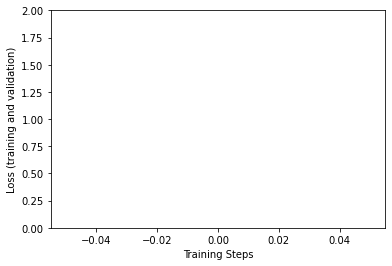

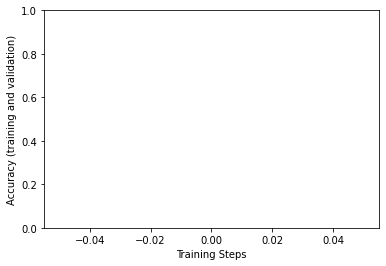

In [56]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(aug_eff_hist["loss"])
plt.plot(aug_eff_hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(aug_eff_hist["accuracy"])
plt.plot(aug_eff_hist["val_accuracy"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


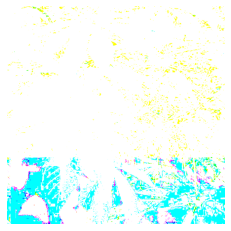

True label: cassava_bacterial_blight
Predicted label: cassava_mosaic_disease
[[1.3907768e-09 5.9996246e-08 3.9429571e-05 9.9996054e-01 5.5314553e-09]]


In [64]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = aug_eff_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])
print(prediction_scores)

In [76]:
prediction_scores.sum()

1.0

In [66]:
np.max(image)
np.min(image)

0.0

In [67]:
class_names

('cassava_bacterial_blight',
 'cassava_brown_streak_disease',
 'cassava_green_mottle',
 'cassava_mosaic_disease',
 'healthy')

In [68]:
prediction_scores = model.predict(np.expand_dims(image, axis=0))
prediction_scores

array([[0.00235342, 0.02096303, 0.00635569, 0.956545  , 0.01378285]],
      dtype=float32)

In [ ]:
predictions_dict = {key: value for key, value in zip(class_names, prediction_scores[0])}

In [ ]:
sorted(predictions_dict, predictions_dict.values())

In [84]:
# Create and train a new model instance.
#model = create_model()
#model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
#!mkdir -p saved_model
model.save('../saved_models/initial_model4')

ValueError: in user code:

    File "/Users/alecsharp/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/saving/saving_utils.py", line 125, in _wrapped_model  *
        outputs = model(*args, **kwargs)
    File "/Users/alecsharp/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer_v1.py", line 647, in __call__  **
        self._assert_built_as_v1()
    File "/Users/alecsharp/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer_v1.py", line 819, in _assert_built_as_v1
        raise ValueError(

    ValueError: Your Layer or Model is in an invalid state. This can happen for the following cases:
     1. You might be interleaving estimator/non-estimator models or interleaving models/layers made in tf.compat.v1.Graph.as_default() with models/layers created outside of it. Converting a model to an estimator (via model_to_estimator) invalidates all models/layers made before the conversion (even if they were not the model converted to an estimator). Similarly, making a layer or a model inside a a tf.compat.v1.Graph invalidates all layers/models you previously made outside of the graph.
    2. You might be using a custom keras layer implementation with  custom __init__ which didn't call super().__init__.  Please check the implementation of <class 'keras.engine.sequential.Sequential'> and its bases.


In [75]:
from tensorflow.compat.v1.keras.experimental import load_from_saved_model

In [78]:
reloaded_model = load_from_saved_model('../saved_models/initial_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})
print(reloaded_model.get_config())

/var/folders/_n/rrz6mzy13l71h2mg878ykrv80000gn/T/ipykernel_57474/4282255705.py:1: UserWarning: `tf.keras.experimental.load_from_saved_model` is deprecatedand will be removed in a future version. Please switch to `tf.keras.models.load_model`.
  reloaded_model = load_from_saved_model('../saved_models/initial_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})


FailedPreconditionError: ../saved_models/initial_model.h5/assets/saved_model.json; Not a directory

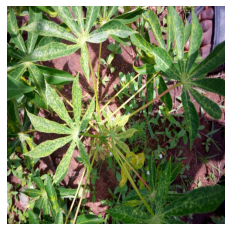

True label: cassava_green_mottle
Predicted label: cassava_mosaic_disease
[[0.12457515 0.14322323 0.15628603 0.4419239  0.13399176]]


In [40]:
x, y = next(iter(val_ds))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = new_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + class_names[true_index])
print("Predicted label: " + class_names[predicted_index])
print(prediction_scores)